<a href="https://colab.research.google.com/github/karldeguzman32/DSP/blob/main/Lab03/58044_Lab03_DSPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [700]:
!git clone https://github.com/AllenDowney/ThinkDSP.git

fatal: destination path 'ThinkDSP' already exists and is not an empty directory.


In [701]:
import os
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import thinkplot
import IPython

#Types of Media/Signal for Manipulation
Here are the different types of media/signal imported for the lab activity.

###Trumpet Charge
It is a WAV type of file which is a sound name "Charge Cheer" trumpet version produced by Bobby Morganstein in his album 'The Complete Grand Entrance Party CD'.

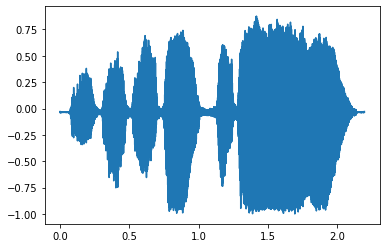

In [702]:
charge = thinkdsp.read_wave('trumpet_charge.wav')
charge.plot()
charge.make_audio()

###iPhone Ringtone
It is a WAV type of file which is a ringtone heard commonly from iPhones.

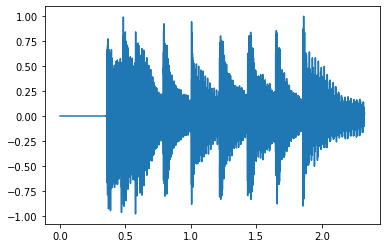

In [703]:
ringtone = thinkdsp.read_wave('ringtone.wav')
ringtone.plot()
ringtone.make_audio()

###Samsung Alarm Sound
It is a WAV type of file which is a ringtone heard used for alarms commonly from Samsung.

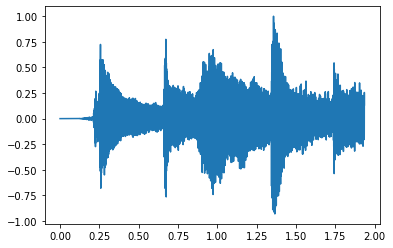

In [704]:
alarm = thinkdsp.read_wave('alarm.wav')
alarm.plot()
alarm.make_audio()

#Sound Manipulation

##1. Amplitude Operations
In this operation, the amplitude of the signals were modified such as volume increase or decrease. The trumpet charge was used for the operation.

In [705]:
def volume_change(wave, factor):
    wave.ys *= factor

In [706]:
louder_charge = charge.copy()

For the first audio basing on the graph, it can be seen that the value of the amplitude was doubled, therefore it should be louder, but for unknown reason, the audio's volume in the player did not change.

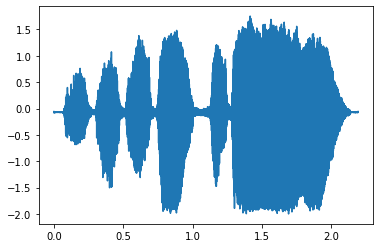

In [707]:
volume_change(louder_charge, 2)
louder_charge.plot()
louder_charge.make_audio()

In [708]:
low_volume_charge = charge.copy()

For the second audio basing on the graph, it can be seen that the value of the amplitude was halved, therefore it should be louder, but for unknown reason, the audio's volume in the player did not change.

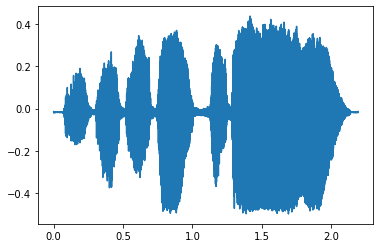

In [709]:
volume_change(low_volume_charge, 0.5)
low_volume_charge.plot()
low_volume_charge.make_audio()

##Frequency Operations
In this operation, the frequency of the signals were modified such as speeding up or slowing down. The iPhone ringtone was used for this operation

In [710]:
def speed_change(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

For the first audio, the sound became slower because the framerate attribute of the wave was divided by a factor of 2. Therefore, to finish the sound, it would require more than 4 seconds.

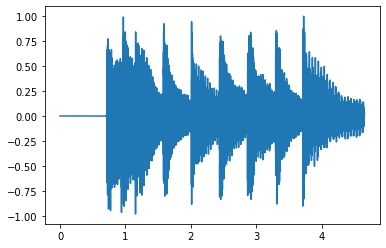

In [711]:
slower_ringtone = ringtone.copy()
speed_change(slower_ringtone, 2)
slower_ringtone.plot()
slower_ringtone.make_audio()

For the second audio, the sound became faster because the framerate attribute of the wave was divided by a factor of 0.5. Therefore, to finish the sound, it would only require less than 1.2 seconds.

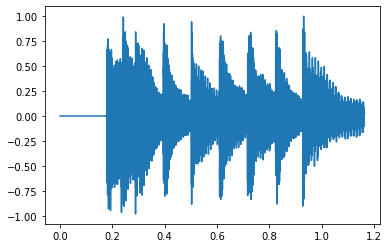

In [712]:
faster_ringtone = ringtone.copy()
speed_change(faster_ringtone, 0.5)
faster_ringtone.plot()
faster_ringtone.make_audio()

##Spectrum Modification
In this operation, components of the spectrum were attenudated based on the condition such as low-pass filter and high-pass filter. The Samsung Alarm sound was used for this operation.

Here is the spectrum of the sound.

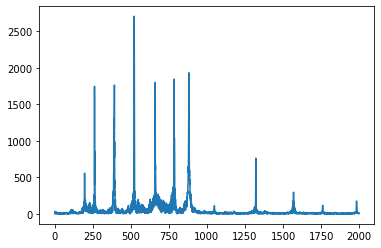

In [726]:
spectrum1 = alarm.make_spectrum()
spectrum1.plot(high=2000)

Low-pass filter means that components above a given cutoff frequency, in this case, above 800 are attenuated.

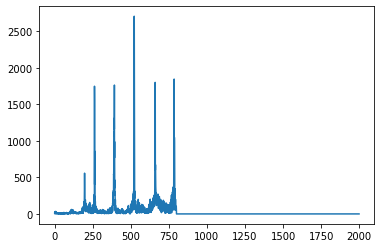

In [727]:
spectrum1.low_pass(800)
spectrum1.plot(high=2000)

It removes the bright, high-frequency sounds, so the results were muffled and darker.

In [728]:
spectrum1.make_wave().make_audio()

High-pass filter means that components below a given cutoff frequency, in this case, below 800 are attenuated.

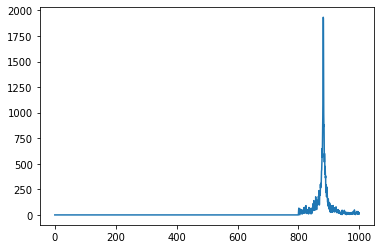

In [729]:
spectrum2 = alarm.make_spectrum()
spectrum2.high_pass(800)
spectrum2.plot(high=1000)

It removes the low-frequency sounds, so the results were brighter.

In [730]:
spectrum2.make_wave().make_audio()

Adding the attenuated values brings back the original sound.

In [731]:
output = spectrum1 + spectrum2
output.make_wave().make_audio()